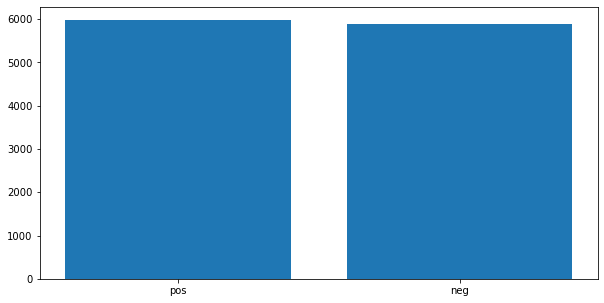

In [244]:
from codecs import open
from __future__ import division
from sklearn.feature_extraction.text import CountVectorizer
import matplotlib.pyplot as plt

def read_documents(doc_file):
    docs = []
    labels = []
    with open(doc_file, encoding='utf-8') as f:
        for line in f:
            words = line.strip().split()
            docs.append(" ".join(words[3:]))
            labels.append(words[1])
    return docs, labels

all_docs, all_labels = read_documents('all_sentiment_shuffled.txt')

split_point = int(0.80*len(all_docs))
train_docs = all_docs[:split_point]
train_labels = all_labels[:split_point]
eval_docs = all_docs[split_point:]
eval_labels = all_labels[split_point:]

vectorizer = CountVectorizer()
train_docs_vector = vectorizer.fit_transform(train_docs)
eval_docs_vector = vectorizer.transform(eval_docs)

data = {'pos':all_labels.count("pos"), 'neg':all_labels.count("neg")} 
ratings = list(data.keys()) 
counts = list(data.values()) 

fig = plt.figure(figsize = (10, 5))
plt.bar(ratings, counts)
plt.show()


In [234]:
from sklearn.naive_bayes import MultinomialNB
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = MultinomialNB().fit(train_docs_vector, train_labels)
prediction_naive = clf.predict(eval_docs_vector)

naive_cm = confusion_matrix(eval_labels, prediction_naive)
naive_ps = precision_score(eval_labels, prediction_naive, average='weighted')
naive_rs = recall_score(eval_labels, prediction_naive, average='weighted')
naive_f1 = f1_score(eval_labels, prediction_naive, average='weighted')
naive_accuracy = accuracy_score(eval_labels, prediction_naive, normalize=True)

f = open("Naive Bayes - all_sentiment_shuffled.txt", "w")
sp_inc = split_point 
for x in prediction_naive:
    f.write(f"{sp_inc}, {x}\n")
    sp_inc += 1
    
f.write("\nConfusion Matrix for Naive Bayes: " + str(naive_cm))
f.write("\nPrecision Score for Naive Bayes: " + str(naive_ps))
f.write("\nRecall Score for Naive Bayes: " + str(naive_rs))
f.write("\nf1-measure for Naive Bayes: " + str(naive_f1))
f.write("\nAccuracy for Naive Bayes: " + str(naive_accuracy))


45

In [235]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier(criterion='entropy')
clf.fit(train_docs_vector, train_labels)
prediction_base = clf.predict(eval_docs_vector)

naive_cm = confusion_matrix(eval_labels, prediction_base)
naive_ps = precision_score(eval_labels, prediction_base, average='weighted')
naive_rs = recall_score(eval_labels, prediction_base, average='weighted')
naive_f1 = f1_score(eval_labels, prediction_base, average='weighted')
naive_accuracy = accuracy_score(eval_labels, prediction_base, normalize=True)

f = open("Base-DT - all_sentiment_shuffled.txt", "w")
sp_inc = split_point 
for x in prediction_base:
    f.write(f"{sp_inc}, {x}\n")
    sp_inc += 1
    
f.write("\nConfusion Matrix for Naive Bayes: " + str(naive_cm))
f.write("\nPrecision Score for Naive Bayes: " + str(naive_ps))
f.write("\nRecall Score for Naive Bayes: " + str(naive_rs))
f.write("\nf1-measure for Naive Bayes: " + str(naive_f1))
f.write("\nAccuracy for Naive Bayes: " + str(naive_accuracy))

44

In [236]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import confusion_matrix

clf = DecisionTreeClassifier(criterion = 'gini', splitter = 'best')
clf.fit(train_docs_vector, train_labels)
prediction_best = clf.predict(eval_docs_vector)

naive_cm = confusion_matrix(eval_labels, prediction_best)
naive_ps = precision_score(eval_labels, prediction_best, average='weighted')
naive_rs = recall_score(eval_labels, prediction_best, average='weighted')
naive_f1 = f1_score(eval_labels, prediction_best, average='weighted')
naive_accuracy = accuracy_score(eval_labels, prediction_best, normalize=True)

f = open("Best-DT - all_sentiment_shuffled.txt", "w")
sp_inc = split_point 
for x in prediction_best:
    f.write(f"{sp_inc}, {x}\n")
    sp_inc += 1

f.write("\nConfusion Matrix for Naive Bayes: " + str(naive_cm))
f.write("\nPrecision Score for Naive Bayes: " + str(naive_ps))
f.write("\nRecall Score for Naive Bayes: " + str(naive_rs))
f.write("\nf1-measure for Naive Bayes: " + str(naive_f1))
f.write("\nAccuracy for Naive Bayes: " + str(naive_accuracy))

45

In [241]:
error_list = list()

for i in range(len(eval_labels)):
    if prediction_naive[i] != eval_labels[i]:
        error_list.append(i + split_point)

# you may select a few short documents where the probabilities were particularly high in the wrong
# direction.

print(error_list)


[9502, 9505, 9515, 9517, 9522, 9530, 9540, 9541, 9543, 9546, 9548, 9556, 9558, 9569, 9570, 9572, 9573, 9581, 9584, 9585, 9589, 9592, 9594, 9623, 9627, 9628, 9629, 9633, 9641, 9644, 9646, 9652, 9655, 9657, 9660, 9665, 9681, 9689, 9692, 9694, 9699, 9700, 9703, 9704, 9705, 9711, 9757, 9762, 9767, 9772, 9803, 9806, 9815, 9819, 9831, 9835, 9836, 9839, 9840, 9848, 9849, 9853, 9856, 9858, 9873, 9876, 9882, 9886, 9888, 9890, 9893, 9897, 9904, 9909, 9920, 9943, 9945, 9946, 9947, 9951, 9954, 9964, 9967, 9978, 9979, 9999, 10001, 10003, 10004, 10011, 10014, 10021, 10026, 10028, 10035, 10049, 10052, 10055, 10057, 10060, 10063, 10072, 10074, 10076, 10077, 10080, 10083, 10090, 10092, 10099, 10101, 10103, 10107, 10110, 10113, 10125, 10127, 10131, 10141, 10148, 10161, 10175, 10176, 10177, 10180, 10185, 10189, 10195, 10197, 10204, 10207, 10208, 10209, 10261, 10263, 10264, 10265, 10266, 10271, 10273, 10276, 10277, 10303, 10313, 10319, 10330, 10332, 10335, 10337, 10344, 10354, 10355, 10363, 10369, 10372, 